# Model Performance Analysis

In [1]:
from configparser import ConfigParser
import yaml
import os
import pandas as pd
import matplotlib.pyplot as plt

from current_research_feature_effects.plotting.plots import boxplot_model_results

In [2]:
os.chdir("../")
config = ConfigParser()
config.read("config.ini")

['config.ini']

In [3]:
model_results_storage = config.get("storage", "model_results")
experiment_name = config.get("storage", "simulation_name")
with open(config.get("simulation_params", "datasets_yaml"), "r") as file:
    datasets_config = yaml.safe_load(file)
datasets = list(datasets_config.keys())
df = pd.DataFrame()
dfs = []
for dataset in datasets:
    df_temp = pd.read_sql_table(
        "model_results", f"sqlite:///experiments/{experiment_name}/{dataset}{model_results_storage}"
    )
    df_temp["dataset"] = dataset
    dfs.append(df_temp)
    df = pd.concat([df, df_temp]).drop(columns=["index"])

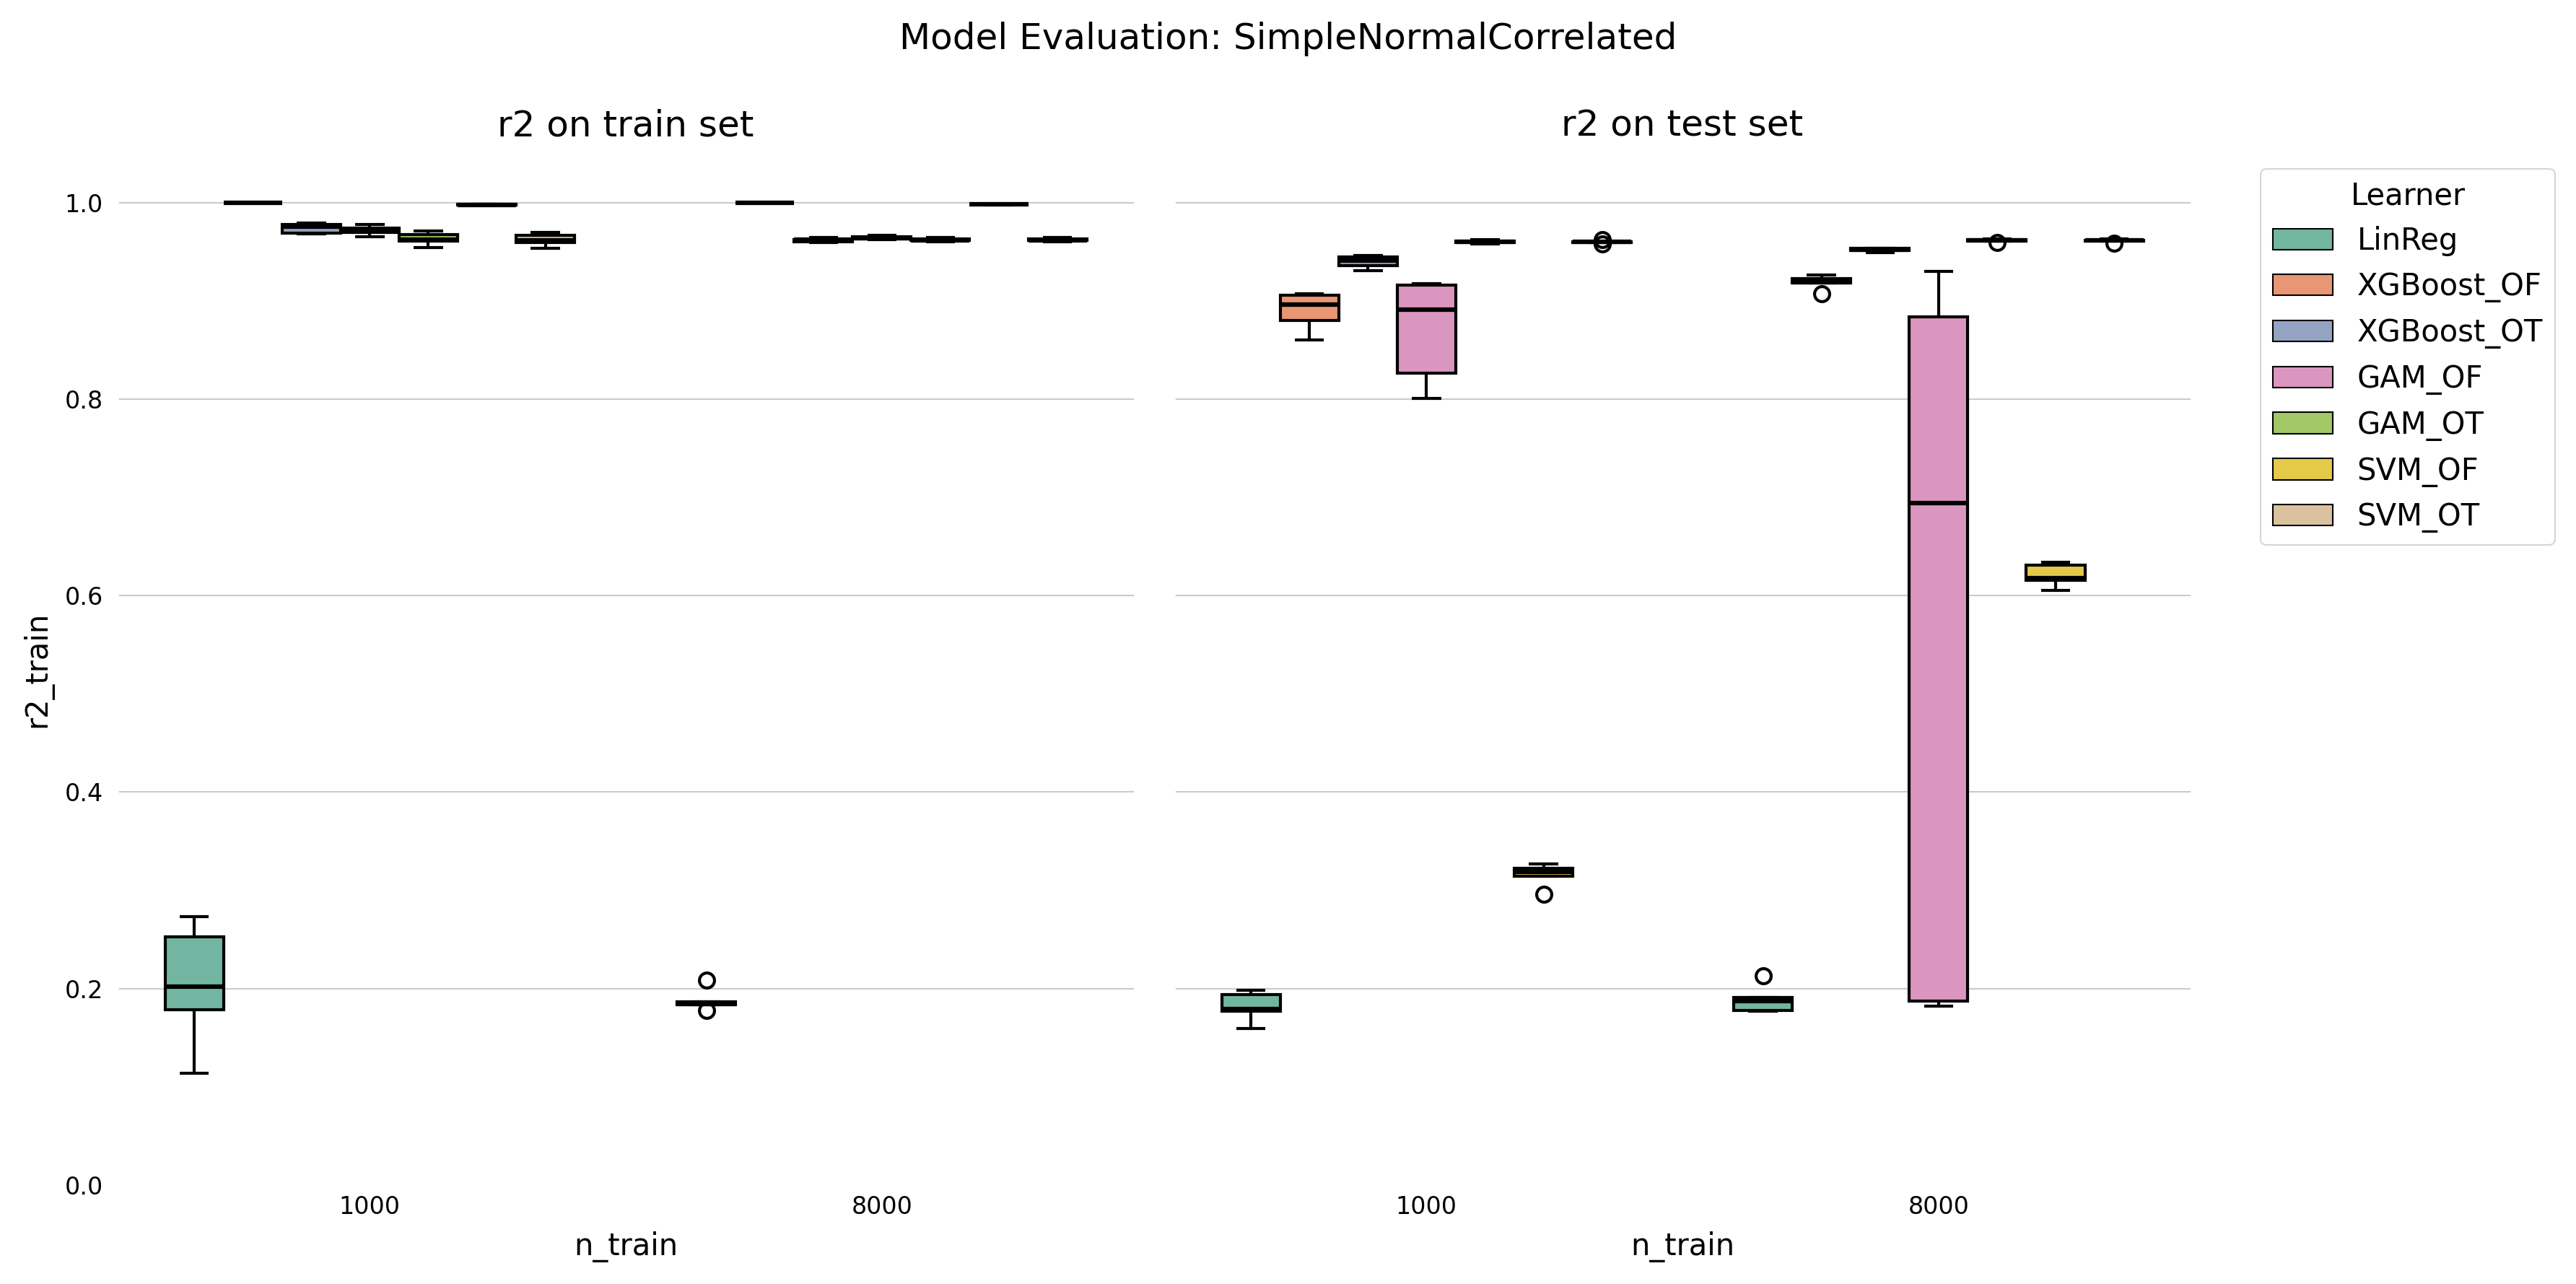

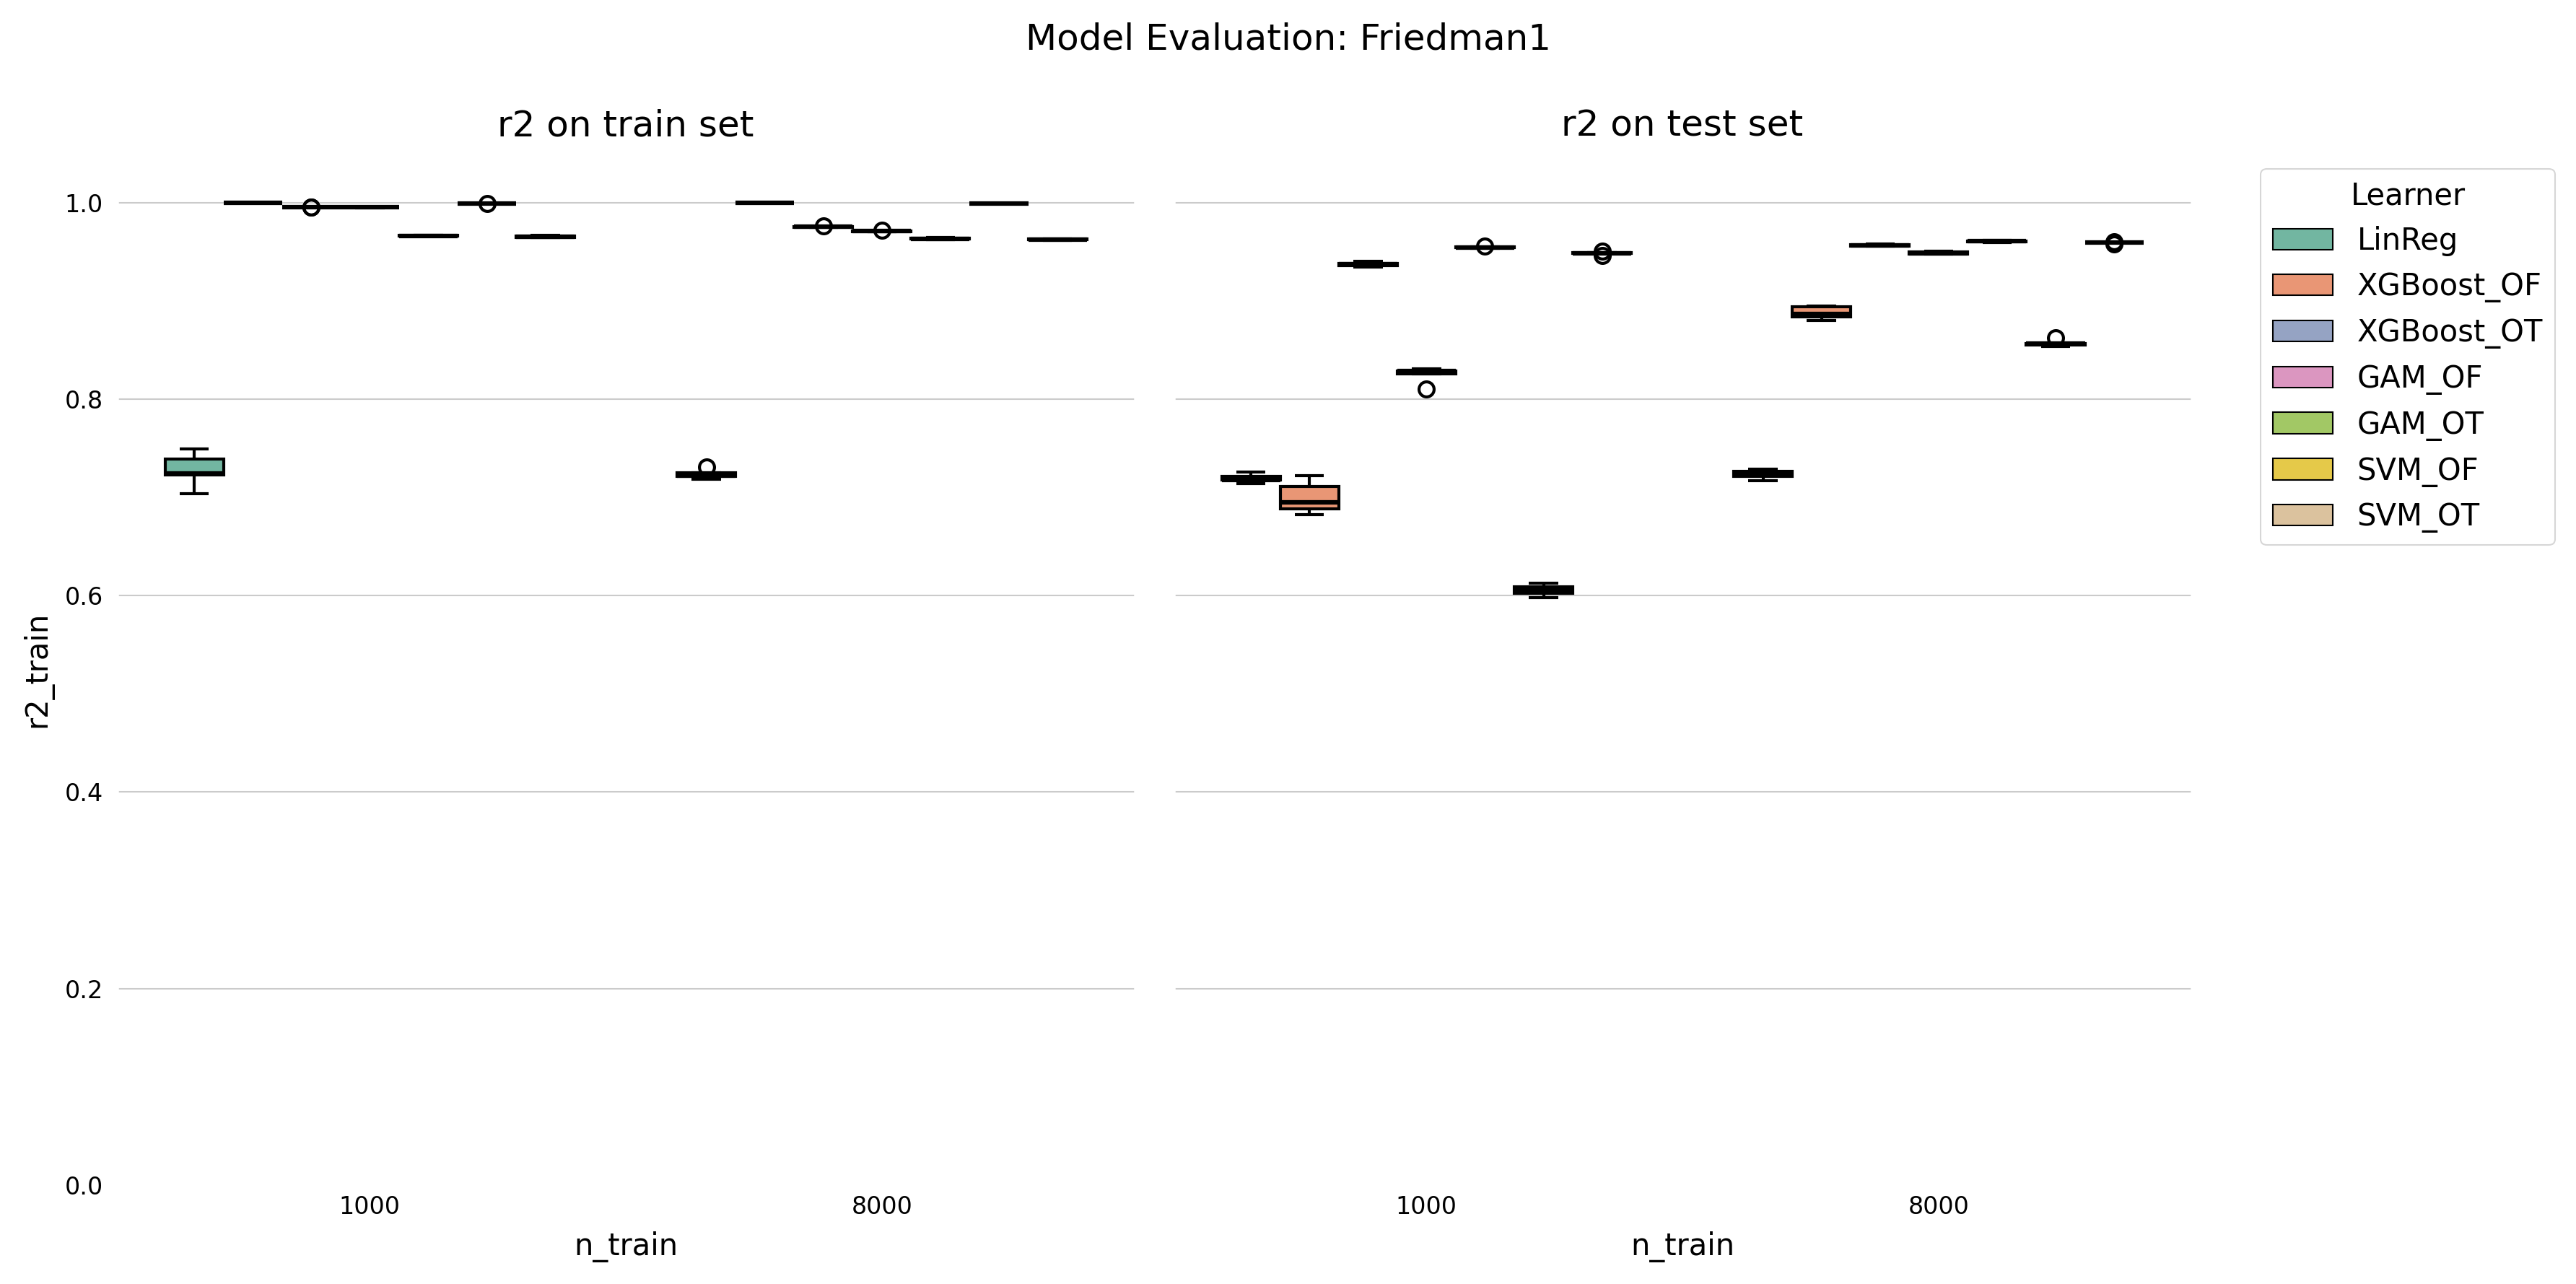

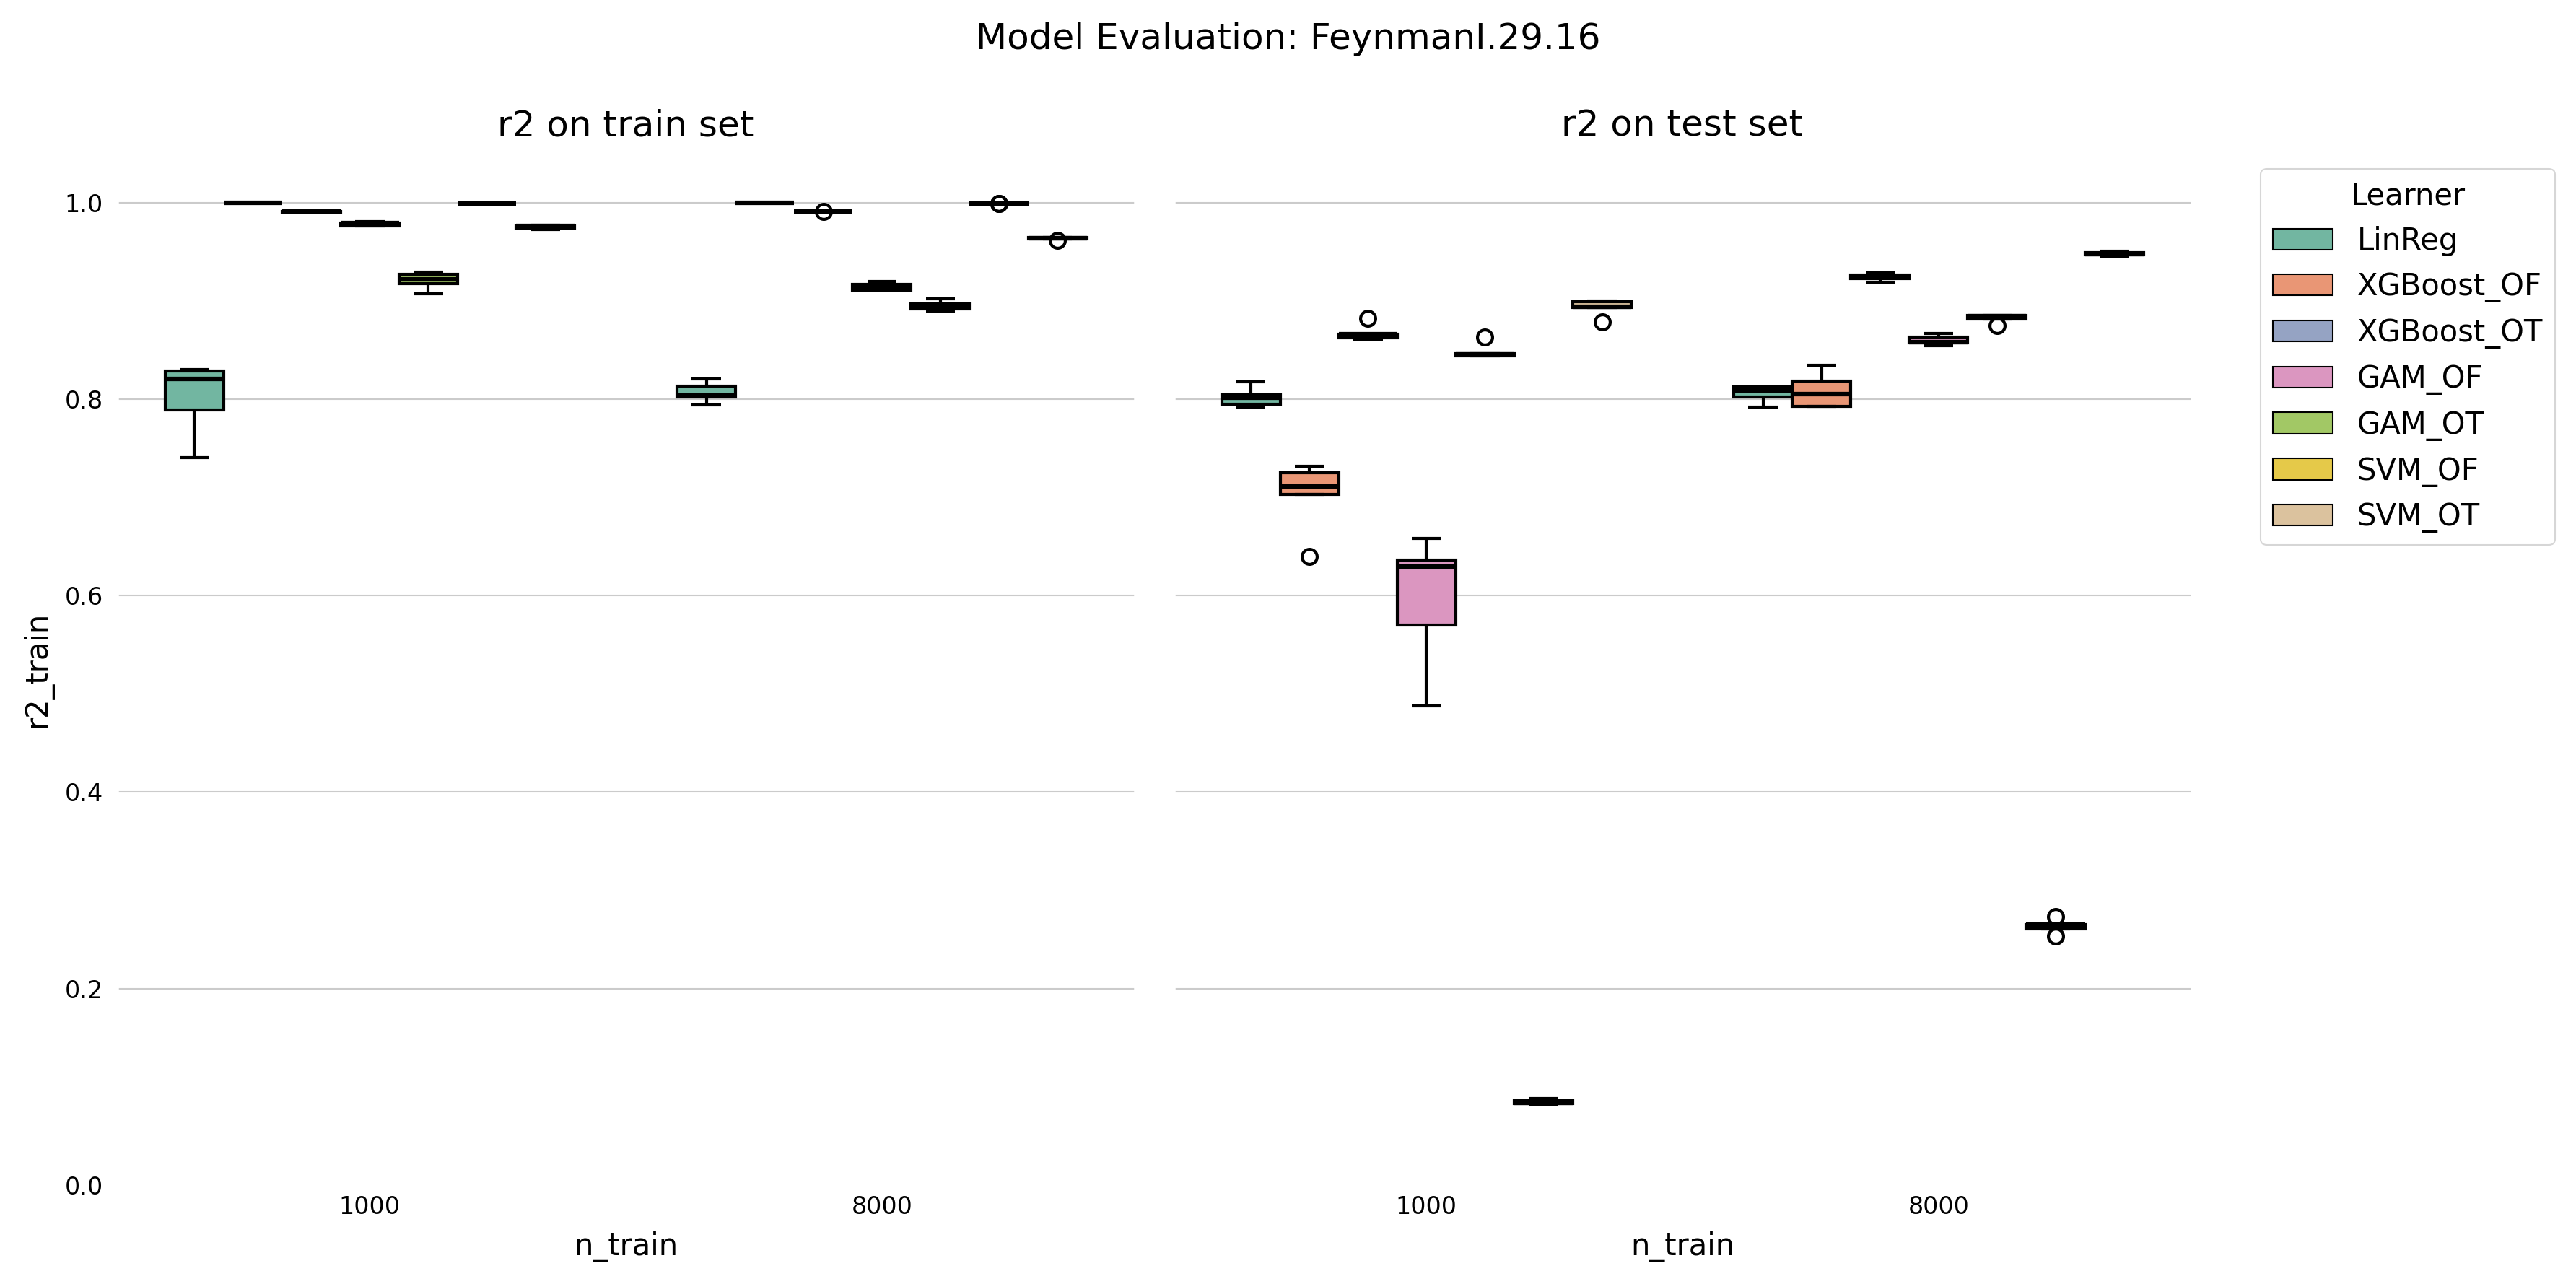

In [4]:
for df_, dataset in zip(dfs, datasets):
    boxplot_model_results(metric='r2', df=df_, ylim=(0, 1.05))
    plt.gcf().suptitle(f"Model Evaluation: {dataset}")

In [5]:
df_grouped = (
    df.groupby(["dataset", "n_train", "model"])
    .agg({"r2_train": ["mean", "std"], "r2_test": ["mean", "std"]})
    .round(4)
    .assign(
        r2_train=lambda x: x["r2_train"]["mean"].astype(str) + " ± " + x["r2_train"]["std"].astype(str),
        r2_test=lambda x: x["r2_test"]["mean"].astype(str) + " ± " + x["r2_test"]["std"].astype(str),
    )
    .droplevel(1, axis=1)
)
df_reshaped = (
    df_grouped.loc[:, ~df_grouped.columns.duplicated()]
    .reset_index()
    .pivot(columns="dataset", index=["n_train", "model"], values=["r2_train", "r2_test"])
    .reorder_levels([1, 0], axis=1)
    .reindex(
        columns=[
            ("SimpleNormalCorrelated", "r2_train"),
            ("SimpleNormalCorrelated", "r2_test"),
            ("Friedman1", "r2_train"),
            ("Friedman1", "r2_test"),
            ("FeynmanI.29.16", "r2_train"),
            ("FeynmanI.29.16", "r2_test"),
        ]
    )
)
df_reshaped

dataset            SimpleNormalCorrelated                         Friedman1  \
                                 r2_train          r2_test         r2_train   
n_train model                                                                 
1000    GAM_OF            0.9719 ± 0.0047  0.8704 ± 0.0537  0.9955 ± 0.0004   
        GAM_OT            0.9635 ± 0.0064  0.9603 ± 0.0015  0.9664 ± 0.0005   
        LinReg             0.204 ± 0.0632  0.1814 ± 0.0156   0.728 ± 0.0172   
        SVM_OF            0.9983 ± 0.0003   0.3158 ± 0.012     0.9996 ± 0.0   
        SVM_OT            0.9623 ± 0.0065  0.9602 ± 0.0015  0.9655 ± 0.0009   
        XGBoost_OF              1.0 ± 0.0  0.8901 ± 0.0198        1.0 ± 0.0   
        XGBoost_OT         0.9742 ± 0.005    0.94 ± 0.0064  0.9957 ± 0.0001   
8000    GAM_OF            0.9643 ± 0.0018  0.5754 ± 0.3678  0.9711 ± 0.0007   
        GAM_OT            0.9625 ± 0.0017  0.9616 ± 0.0014  0.9634 ± 0.0007   
        LinReg            0.1882 ± 0.0118  0.1891 ± 0.0145  0.7237 ± 0.0049   
        SVM_OF            0.9983 ± 0.0001  0.6208 ± 0.0117     0.9996 ± 0.0   
        SVM_OT            0.9625 ± 0.0017  0.9614 ± 0.0015  0.9628 ± 0.0006   
        XGBoost_OF              1.0 ± 0.0  0.9189 ± 0.0072        1.0 ± 0.0   
        XGBoost_OT        0.9619 ± 0.0021   0.952 ± 0.0019  0.9758 ± 0.0005   

dataset                               FeynmanI.29.16                   
                            r2_test         r2_train          r2_test  
n_train model                                                          
1000    GAM_OF      0.8248 ± 0.0084   0.9787 ± 0.002   0.5965 ± 0.069  
        GAM_OT      0.9548 ± 0.0007  0.9208 ± 0.0087  0.8486 ± 0.0081  
        LinReg      0.7195 ± 0.0044  0.8018 ± 0.0379  0.8023 ± 0.0101  
        SVM_OF      0.6056 ± 0.0059   0.999 ± 0.0001  0.0846 ± 0.0024  
        SVM_OT      0.9488 ± 0.0015  0.9754 ± 0.0018  0.8932 ± 0.0086  
        XGBoost_OF  0.6998 ± 0.0164        1.0 ± 0.0  0.7022 ± 0.0366  
        XGBoost_OT  0.9373 ± 0.0022   0.991 ± 0.0005  0.8678 ± 0.0085  
8000    GAM_OF      0.9489 ± 0.0013  0.9148 ± 0.0039  0.8601 ± 0.0049  
        GAM_OT      0.9606 ± 0.0009   0.8951 ± 0.005  0.8825 ± 0.0042  
        LinReg      0.7236 ± 0.0047  0.8069 ± 0.0101  0.8058 ± 0.0087  
        SVM_OF      0.8569 ± 0.0034      0.999 ± 0.0  0.2637 ± 0.0072  
        SVM_OT      0.9594 ± 0.0007  0.9638 ± 0.0013  0.9482 ± 0.0018  
        XGBoost_OF  0.8879 ± 0.0064        1.0 ± 0.0  0.8088 ± 0.0178  
        XGBoost_OT  0.9569 ± 0.0009  0.9912 ± 0.0002  0.9244 ± 0.0037